In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load the dataset
df = pd.read_csv("C:\\Users\\Abhishek\\Desktop\\AIML\\Machine Learning_Code\\Assignment_1(Classification)\\Leads.csv")

# Check for any initial insights
df.head()
df.info()  # Check data types and missing values
df.describe()  # Get summary stats for numerical columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [33]:
df.shape

(9240, 37)

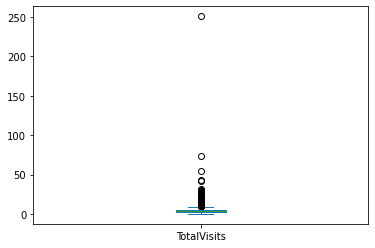

In [3]:
# Drop columns with too many missing values if necessary
df = df.dropna(thresh=0.7*len(df), axis=1)

# drop remaining missing values
df = df.dropna()



# Convert categorical columns to numerical 
df = pd.get_dummies(df, drop_first=True)

# Check for any outliers
df['TotalVisits'].plot(kind='box')

# Separate the target variable
X = df.drop('Converted', axis=1)
y = df['Converted']




In [4]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Initialize the Random Forest model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability scores


In [6]:
# Evaluation Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Accuracy: 0.8159675236806495
Precision: 0.822742474916388
Recall: 0.7477203647416414
F1 Score: 0.7834394904458599
ROC AUC Score: 0.8951562384164875


In [7]:
# Add lead scores to the test data
X_test['Lead Score'] = y_pred_proba * 100  # Scale to 0-100

# View top leads
top_leads = X_test.sort_values(by='Lead Score', ascending=False)
print(top_leads[['Lead Score']].head(10))


      Lead Score
2943       100.0
2946       100.0
1552       100.0
4179        99.0
1267        99.0
3074        98.0
7420        98.0
4935        98.0
5541        98.0
2337        98.0


In [17]:
# Set threshold for high-potential leads
threshold = 0.8  # Experiment with thresholds to get close to 80%

# Select leads above the threshold
hot_leads = top_leads[top_leads['Lead Score'] >= threshold * 100]
print("Potential hot leads:")
print(hot_leads[['Lead Score']].head(10))
print("Total Count",hot_leads[['Lead Score']].count())


Potential hot leads:
      Lead Score
2943       100.0
2946       100.0
1552       100.0
4179        99.0
1267        99.0
3074        98.0
7420        98.0
4935        98.0
5541        98.0
2337        98.0
Total Count Lead Score    222
dtype: int64
